In [1]:
# We use dataset from kaggle https://www.kaggle.com/tunguz/cryptopunks
# Using a file with ranks
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.express as px

In [2]:
#Uploading the file with cryptopunks
df = pd.read_json("txn_history-2021-10-07.jsonl", lines=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167492 entries, 0 to 167491
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   txn_type             167492 non-null  object        
 1   from                 167492 non-null  object        
 2   to                   167492 non-null  object        
 3   date                 167492 non-null  datetime64[ns]
 4   timestamp            167492 non-null  datetime64[ns]
 5   source               167492 non-null  object        
 6   eth                  127542 non-null  float64       
 7   punk_id              167492 non-null  int64         
 8   from_wallet_address  419 non-null     object        
 9   to_wallet_address    419 non-null     object        
 10  type                 167492 non-null  object        
 11  accessories          167492 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(8)
memory usage: 15.3

In [4]:
#Uploading the file with ranks
rank = pd.read_csv("cryptopunks.csv", sep = ',')

In [5]:
rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   0           10000 non-null  object
 2   1           10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [6]:
#Removing an extra column
rank.pop('Unnamed: 0')

0          0
1          1
2          2
3          3
4          4
        ... 
9995    9995
9996    9996
9997    9997
9998    9998
9999    9999
Name: Unnamed: 0, Length: 10000, dtype: int64

In [7]:
# Renaming a column
rank.rename(columns = {'0' : 'punk_id', '1' : 'Rank'}, inplace = True) 

In [8]:
# Remove the name Cryptopunks # from the column
rank['punk_id'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [9]:
# Change column format to int
rank['punk_id'] = rank['punk_id'].astype(int)

In [10]:
rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   punk_id  10000 non-null  int32
 1   Rank     10000 non-null  int64
dtypes: int32(1), int64(1)
memory usage: 117.3 KB


In [19]:
#Change column to date
df['date'] = pd.to_datetime(df.date)

In [20]:
df = df[["txn_type", "date", "eth", "punk_id", "type", "accessories"]]

In [21]:
df = df.explode("type")
df.head()

,txn_type,date,eth,punk_id,type,accessories
0,Bid Withdrawn,2021-09-04,321.0,0,Female,"[Green Eye Shadow, Earring, Blonde Bob]"
1,Bid,2021-09-01,321.0,0,Female,"[Green Eye Shadow, Earring, Blonde Bob]"
2,Bid Withdrawn,2021-09-01,320.0,0,Female,"[Green Eye Shadow, Earring, Blonde Bob]"
3,Bid,2021-09-01,320.0,0,Female,"[Green Eye Shadow, Earring, Blonde Bob]"
4,Bid Withdrawn,2021-09-01,263.0,0,Female,"[Green Eye Shadow, Earring, Blonde Bob]"


In [22]:
# Merge two frames
punks = df.merge(rank, how = 'inner', on = 'punk_id' )

In [152]:
fig = px.bar(punks.drop_duplicates("punk_id")['type'].value_counts().rename_axis('type').reset_index(name='counts'),
             x="type", y="counts", color="type", title="Cryptopunk Type Counts", log_y = True)
fig.show()

In [24]:
punks['num_attributes'] = punks.accessories.apply(lambda x: len(x))

In [153]:
fig = px.bar(punks.drop_duplicates("punk_id")['num_attributes'].value_counts().rename_axis('num_attributes').reset_index(name='counts'),
             x="num_attributes", y="counts", color="num_attributes", title="Cryptopunk Punk_id Distribution of Number of Attributes", log_y = True)
fig.show()

In [26]:
fig.write_image('Cryptopunk Rank Distribution of Number of Attributes.png')

In [30]:
# Group by num_attributes
b = punks.groupby(['num_attributes']).count()
b = b.reset_index()

In [31]:
#Look at the types of transactions

In [32]:
punks['txn_type'].unique()

array(['Bid Withdrawn', 'Bid', 'Sold', 'Offered', 'Transfer', 'Claimed',
       'Offer Withdrawn', '(Wrap)', '(Unwrap)'], dtype=object)

In [154]:
fig = px.bar(b, x="num_attributes", y="txn_type", color="txn_type", title="Cryptopunk Number attributes Distribution of Number of Transaction", log_y = True)
fig.show()

In [34]:
#We see confirmation that the majority of transactions by the number of attributes are 2 and 3, since the largest number of cryptopunks have 2 and 3 attributes.

In [35]:
fig.write_image('Cryptopunk Rank Distribution of Number of TransactionsType.png')

In [36]:
# Group by Type
type_vs_tr = punks.groupby(['type']).count()
type_vs_tr = type_vs_tr.reset_index()

In [155]:
fig = px.bar(type_vs_tr, x="type", y="txn_type", color="txn_type", title="Cryptopunk Type Distribution of Number Transactions", log_y = True)
fig.show()

In [38]:
#We see confirmation that the most transactions are in men, as they are the most common

In [39]:
df_tran = punks.groupby(['punk_id']).agg(any_tran=('txn_type', 'count'),
       accesssor=('num_attributes', 'last'))

In [40]:
df_tran

,any_tran,accesssor
punk_id,,
0,41,3
1,63,2
2,30,1
3,17,3
4,12,4
...,...,...
9995,7,2
9996,5,4
9997,43,2


In [41]:
#Checking the correlation between the number of transactions and the number of attributes

<AxesSubplot:>

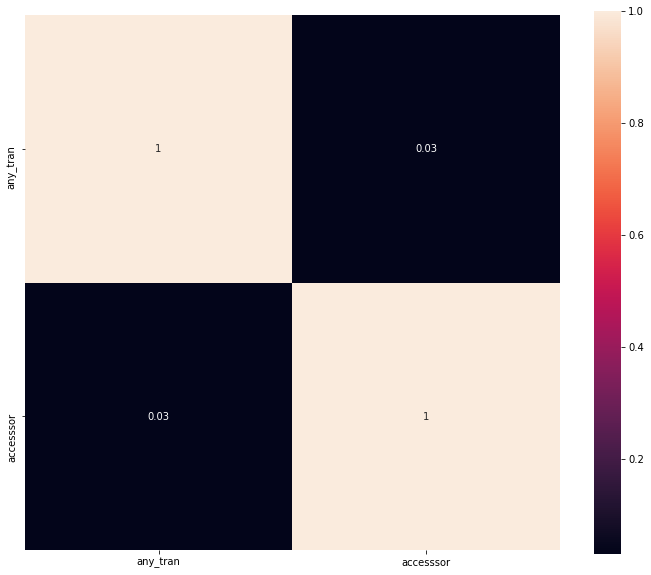

In [42]:
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df_tran.corr(), square=True, annot=True, cbar=True, ax=ax)

In [43]:
#We want to test the hypothesis from the correlation between the price of ETH and the price of NFT

In [44]:
#library yahoo finance

In [45]:
import  yfinance  as  yf

In [46]:
#downloads quotes

In [47]:
quotes = yf.download('ETH-USD', start="2019-01-01", end="2022-03-31")

[*********************100%***********************]  1 of 1 completed


In [48]:
quotes1=  quotes

In [49]:
quotes1= quotes1.reset_index()

In [50]:
quotes1.rename(columns = {'Date' : 'date'}, inplace = True) 

In [51]:
quotes1

,date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-31,140.031067,140.181152,132.519394,133.368256,133.368256,2358360234
1,2019-01-01,133.418152,141.397507,132.650711,140.819412,140.819412,2258709868
2,2019-01-02,141.519516,156.929138,140.650955,155.047684,155.047684,3328240369
3,2019-01-03,155.196045,155.863052,147.198364,149.135010,149.135010,2676164880
4,2019-01-04,148.912888,156.878983,147.907104,154.581940,154.581940,3126192535
...,...,...,...,...,...,...,...
1181,2022-03-26,3106.405273,3146.825439,3091.825439,3143.178955,3143.178955,8876420740
1182,2022-03-27,3143.795654,3291.577637,3129.997803,3291.577637,3291.577637,13431866834
1183,2022-03-28,3292.322510,3424.019287,3279.027100,3336.634521,3336.634521,20620450770
1184,2022-03-29,3335.021240,3470.186279,3335.021240,3401.987793,3401.987793,19533323636


In [52]:
# Merge two frames punks and quotes
punks1 = punks.merge(quotes1, how = 'inner', on = 'date' )

In [53]:
# We leave only the type sold
sold = punks1[punks1.txn_type == "Sold"]

In [54]:
punks_price = sold[['eth','Open','High','Low','Close']]

In [55]:
punks_price

,eth,Open,High,Low,Close
6,97.25,3937.910156,3969.448730,3837.931152,3887.828369
12,98.00,3937.910156,3969.448730,3837.931152,3887.828369
18,105.00,3937.910156,3969.448730,3837.931152,3887.828369
29,100.00,3937.910156,3969.448730,3837.931152,3887.828369
30,104.99,3937.910156,3969.448730,3837.931152,3887.828369
...,...,...,...,...,...
140256,0.79,232.877487,233.901932,229.259460,229.668045
140274,0.35,123.654655,123.841690,120.241898,121.010262
140276,0.30,123.654655,123.841690,120.241898,121.010262
140284,0.60,133.612320,135.634552,129.730942,135.634552


<AxesSubplot:>

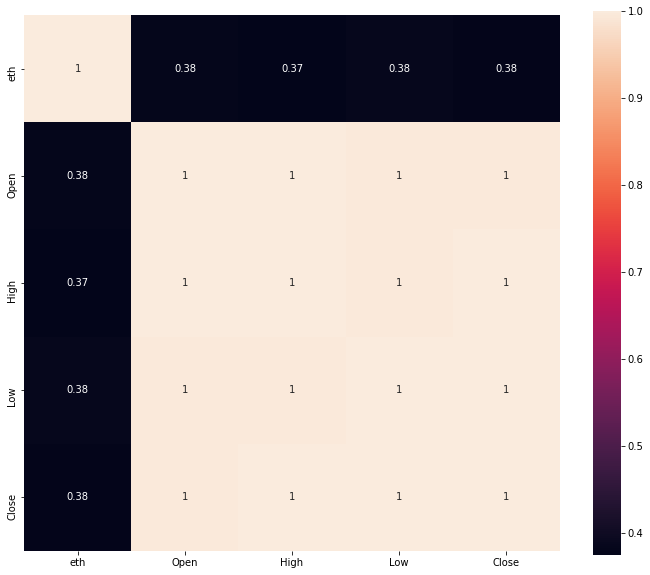

In [56]:
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(punks_price.corr(), square=True, annot=True, cbar=True, ax=ax)

In [57]:
#We see little correlation between NFT selling price and ETH price

In [58]:
#We want to check the change in the number of sales from the ETH price

In [59]:
df_tran_pr = punks1.groupby(['punk_id']).agg(sold_tran=('txn_type', 'count'),
       accesssor=('num_attributes', 'last'),
       pr_nft=('eth','max'),
       pr_eth=('Close','max'),
       rank =('Rank','last')
                            )

In [60]:
df_tran_pr

,sold_tran,accesssor,pr_nft,pr_eth,rank
punk_id,,,,,
0,22,3,321.0,3952.293945,4005
1,43,2,895.0,3887.828369,5066
2,22,1,48.0,3167.856201,774
3,6,3,33.0,3270.600830,4369
4,8,4,28.0,3715.148438,999
...,...,...,...,...,...
9995,5,2,30.0,2344.895020,3807
9996,2,4,1.0,1382.274048,9464
9997,37,2,666.0,3282.397705,105


<AxesSubplot:>

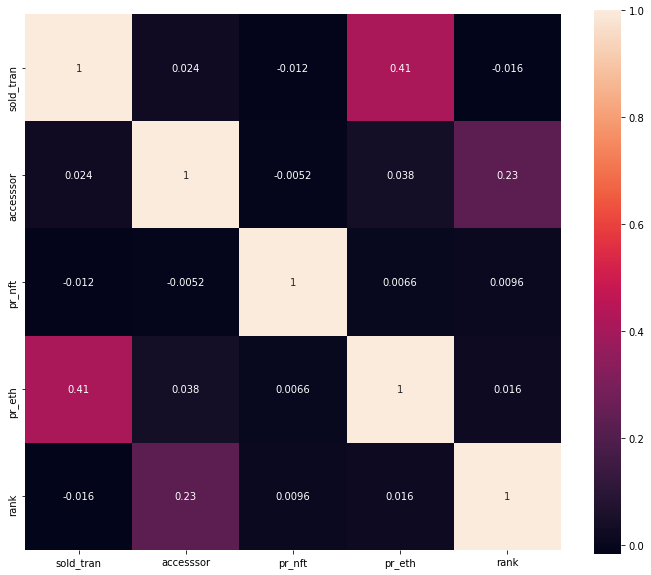

In [61]:
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df_tran_pr.corr(), square=True, annot=True, cbar=True, ax=ax)

In [62]:
#We see that as the price of ether increases, the number of sales increases.

In [63]:
#Let's group by the type of cryptopunks and see the correlations

In [64]:
df_tran_type = punks1.groupby(['type']).agg(sold_tran=('txn_type', 'count'),
       accesssor=('num_attributes', 'mean'),
       pr_nft=('eth','mean'),
       pr_eth=('Close','mean'),
       rank =('Rank','mean')
                            )

In [65]:
df_tran_type

,sold_tran,accesssor,pr_nft,pr_eth,rank
type,,,,,
Alien,257,2.070039,1.764223e+03,1695.531454,13.260700
Ape,499,1.701403,1.005738e+03,1425.725782,29.763527
Female,49205,2.771222,2.274732e+06,1927.872251,4528.600224
Male,88728,2.809519,1.360360e+06,1948.680078,5162.697672
Zombie,1598,2.435544,3.281280e+02,1416.909787,91.210263


<AxesSubplot:>

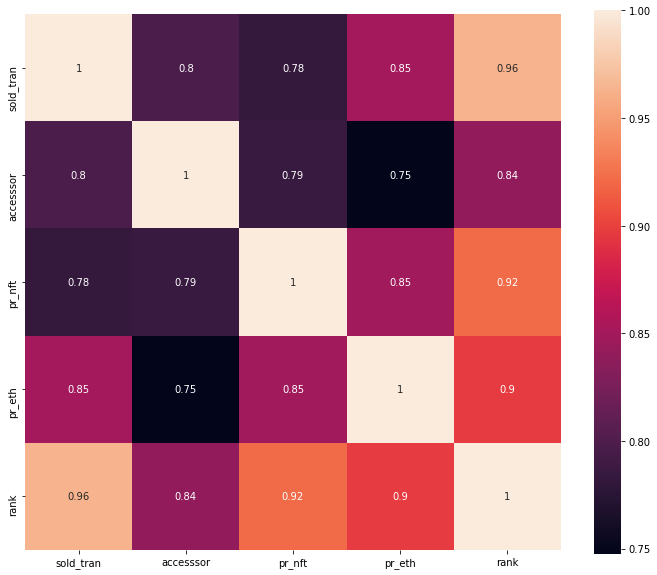

In [66]:
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df_tran_type.corr(), square=True, annot=True, cbar=True, ax=ax)

In [67]:
#Let's group by the number of attributes of cryptopunks and see the correlations

In [68]:
df_tran_attr = punks1.groupby(['num_attributes']).agg(sold_tran=('txn_type', 'count'),
       accesssor=('num_attributes', 'mean'),
       pr_nft=('eth','mean'),
       pr_eth=('Close','mean'),
       rank =('Rank','mean')
                            )

<AxesSubplot:>

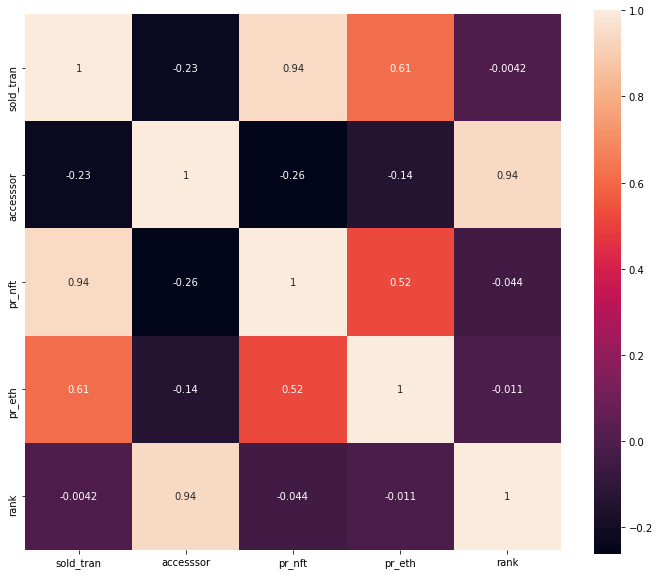

In [69]:
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df_tran_attr.corr(), square=True, annot=True, cbar=True, ax=ax)

In [70]:
#Let's group by the Rank of cryptopunks and see the correlations

In [71]:
df_tran_rank = punks1.groupby(['Rank']).agg(sold_tran=('txn_type', 'count'),
       accesssor=('num_attributes', 'mean'),
       pr_nft=('eth','mean'),
       pr_eth=('Close','mean'),
       rank =('Rank','mean')
                            )

<AxesSubplot:>

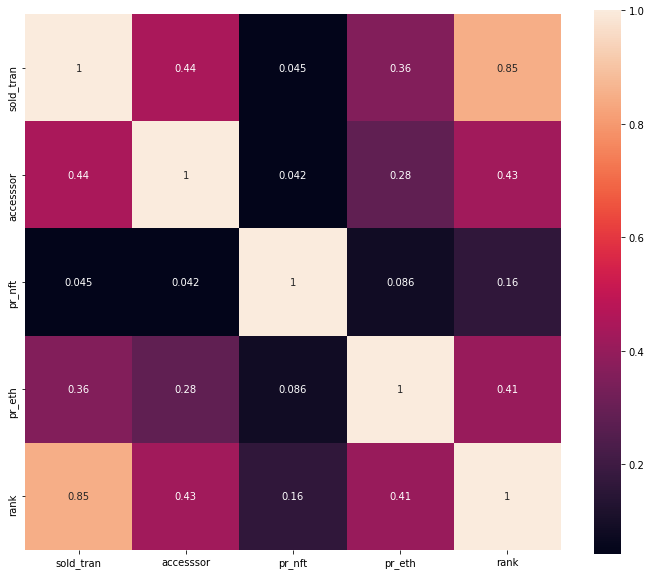

In [72]:
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df_tran_rank.corr(), square=True, annot=True, cbar=True, ax=ax)

In [73]:
#Let's try to build a machine learning model

In [74]:
from sklearn import preprocessing

In [75]:
sold

,txn_type,date,eth,punk_id,type,accessories,Rank,num_attributes,Open,High,Low,Close,Adj Close,Volume
6,Sold,2021-09-04,97.25,618,Female,"[Clown Eyes Green, Wild Hair]",4632,2,3937.910156,3969.448730,3837.931152,3887.828369,3887.828369,20806963328
12,Sold,2021-09-04,98.00,1186,Female,"[Black Lipstick, Bandana, Purple Eye Shadow, E...",6436,4,3937.910156,3969.448730,3837.931152,3887.828369,3887.828369,20806963328
18,Sold,2021-09-04,105.00,1316,Male,"[Frumpy Hair, Front Beard Dark]",7545,2,3937.910156,3969.448730,3837.931152,3887.828369,3887.828369,20806963328
29,Sold,2021-09-04,100.00,1633,Male,"[Cigarette, Bandana, Mole]",9464,3,3937.910156,3969.448730,3837.931152,3887.828369,3887.828369,20806963328
30,Sold,2021-09-04,104.99,1711,Female,"[Eye Mask, Straight Hair Dark]",451,2,3937.910156,3969.448730,3837.931152,3887.828369,3887.828369,20806963328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140256,Sold,2020-06-26,0.79,8666,Male,"[Peak Spike, Earring, Eye Patch]",8466,3,232.877487,233.901932,229.259460,229.668045,229.668045,7187490226
140274,Sold,2019-01-18,0.35,8395,Male,"[Silver Chain, Shaved Head, Big Beard]",2565,3,123.654655,123.841690,120.241898,121.010262,121.010262,2305389800
140276,Sold,2019-01-18,0.30,9453,Male,"[Cigarette, Cap, Mustache]",9464,3,123.654655,123.841690,120.241898,121.010262,121.010262,2305389800
140284,Sold,2020-04-01,0.60,9697,Male,"[Eye Mask, Cap Forward, Earring]",2665,3,133.612320,135.634552,129.730942,135.634552,135.634552,12456564435


In [78]:
total=sold.drop(['date','punk_id','txn_type','accessories'], axis =1)

In [79]:
total

,eth,type,Rank,num_attributes,Open,High,Low,Close,Adj Close,Volume
6,97.25,Female,4632,2,3937.910156,3969.448730,3837.931152,3887.828369,3887.828369,20806963328
12,98.00,Female,6436,4,3937.910156,3969.448730,3837.931152,3887.828369,3887.828369,20806963328
18,105.00,Male,7545,2,3937.910156,3969.448730,3837.931152,3887.828369,3887.828369,20806963328
29,100.00,Male,9464,3,3937.910156,3969.448730,3837.931152,3887.828369,3887.828369,20806963328
30,104.99,Female,451,2,3937.910156,3969.448730,3837.931152,3887.828369,3887.828369,20806963328
...,...,...,...,...,...,...,...,...,...,...
140256,0.79,Male,8466,3,232.877487,233.901932,229.259460,229.668045,229.668045,7187490226
140274,0.35,Male,2565,3,123.654655,123.841690,120.241898,121.010262,121.010262,2305389800
140276,0.30,Male,9464,3,123.654655,123.841690,120.241898,121.010262,121.010262,2305389800
140284,0.60,Male,2665,3,133.612320,135.634552,129.730942,135.634552,135.634552,12456564435


In [80]:
total = pd.get_dummies(total, drop_first = True)

In [81]:
X = total.drop('eth',axis=1).values
Y = total['eth']

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from sklearn import metrics

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [84]:
models = [('Support Vector', SVR()),
         ('Decision Tree', DecisionTreeRegressor()),
         ('KNN', KNeighborsRegressor())]
scores = []

In [85]:
for name, model in models:
    model.fit(X_train, y_train)
    
    prediction = model.predict(X_test)

In [86]:
print('MAE', metrics.mean_absolute_error(y_test, prediction))
print('MSE', metrics.mean_squared_error(y_test, prediction,squared = True))
print('RMSE', metrics.mean_squared_error(y_test, prediction,squared = False))
print('R2 score', metrics.r2_score(y_test, prediction))

MAE 13.55273586028974
MSE 4417.06966237428
RMSE 66.46103867962252
R2 score 0.33749563802397975


In [87]:
ensemble = VotingRegressor(estimators=models)
ensemble.fit(X_train, y_train)
prediction = ensemble.predict(X_test)

In [88]:
print('MAE', metrics.mean_absolute_error(y_test, prediction))
print('MSE', metrics.mean_squared_error(y_test, prediction,squared = True))
print('RMSE', metrics.mean_squared_error(y_test, prediction,squared = False))
print('R2 score', metrics.r2_score(y_test, prediction))

MAE 12.865571888832076
MSE 2541.31221674094
RMSE 50.411429425686194
R2 score 0.6188354367431844


In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

In [90]:
punks1

,txn_type,date,eth,punk_id,type,accessories,Rank,num_attributes,Open,High,Low,Close,Adj Close,Volume
0,Bid Withdrawn,2021-09-04,321.0,0,Female,"[Green Eye Shadow, Earring, Blonde Bob]",4005,3,3937.910156,3969.448730,3837.931152,3887.828369,3887.828369,20806963328
1,Bid Withdrawn,2021-09-04,198.0,1,Male,"[Smile, Mohawk]",5066,2,3937.910156,3969.448730,3837.931152,3887.828369,3887.828369,20806963328
2,Bid,2021-09-04,1.0,6,Male,[Do-rag],4485,1,3937.910156,3969.448730,3837.931152,3887.828369,3887.828369,20806963328
3,Bid,2021-09-04,0.5,28,Male,"[Big Shades, Crazy Hair]",5306,2,3937.910156,3969.448730,3837.931152,3887.828369,3887.828369,20806963328
4,Bid,2021-09-04,0.5,35,Male,"[Cigarette, Peak Spike, Earring, Horned Rim Gl...",9464,5,3937.910156,3969.448730,3837.931152,3887.828369,3887.828369,20806963328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140282,Offered,2019-02-07,5.0,9530,Male,"[Clown Nose, Top Hat]",2035,2,104.835777,106.058876,104.409134,104.535301,104.535301,2326764622
140283,Transfer,2020-03-28,NaN,9561,Male,"[Eye Mask, Headband, Big Beard]",5768,3,134.032745,134.032745,126.962189,130.986496,130.986496,12162403960
140284,Sold,2020-04-01,0.6,9697,Male,"[Eye Mask, Cap Forward, Earring]",2665,3,133.612320,135.634552,129.730942,135.634552,135.634552,12456564435
140285,Sold,2019-08-31,0.5,9943,Female,"[Black Lipstick, Mohawk Thin, Eye Patch, Earri...",9127,5,168.887894,174.323975,167.802582,172.469788,172.469788,5830212249


In [91]:
punks2 = punks1['accessories'].apply(pd.Series)

<ipython-input-91-a19d7d5ddf58>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [92]:
punks2

,0,1,2,3,4,5,6
0,Green Eye Shadow,Earring,Blonde Bob,NaN,NaN,NaN,NaN
1,Smile,Mohawk,NaN,NaN,NaN,NaN,NaN
2,Do-rag,NaN,NaN,NaN,NaN,NaN,NaN
3,Big Shades,Crazy Hair,NaN,NaN,NaN,NaN,NaN
4,Cigarette,Peak Spike,Earring,Horned Rim Glasses,Normal Beard,NaN,NaN
...,...,...,...,...,...,...,...
140282,Clown Nose,Top Hat,NaN,NaN,NaN,NaN,NaN
140283,Eye Mask,Headband,Big Beard,NaN,NaN,NaN,NaN
140284,Eye Mask,Cap Forward,Earring,NaN,NaN,NaN,NaN
140285,Black Lipstick,Mohawk Thin,Eye Patch,Earring,Cigarette,NaN,NaN


In [93]:
punks3 = pd.concat([punks1[:], punks2[:]], axis=1)
punks3

,txn_type,date,eth,punk_id,type,accessories,Rank,num_attributes,Open,High,...,Close,Adj Close,Volume,0,1,2,3,4,5,6
0,Bid Withdrawn,2021-09-04,321.0,0,Female,"[Green Eye Shadow, Earring, Blonde Bob]",4005,3,3937.910156,3969.448730,...,3887.828369,3887.828369,20806963328,Green Eye Shadow,Earring,Blonde Bob,NaN,NaN,NaN,NaN
1,Bid Withdrawn,2021-09-04,198.0,1,Male,"[Smile, Mohawk]",5066,2,3937.910156,3969.448730,...,3887.828369,3887.828369,20806963328,Smile,Mohawk,NaN,NaN,NaN,NaN,NaN
2,Bid,2021-09-04,1.0,6,Male,[Do-rag],4485,1,3937.910156,3969.448730,...,3887.828369,3887.828369,20806963328,Do-rag,NaN,NaN,NaN,NaN,NaN,NaN
3,Bid,2021-09-04,0.5,28,Male,"[Big Shades, Crazy Hair]",5306,2,3937.910156,3969.448730,...,3887.828369,3887.828369,20806963328,Big Shades,Crazy Hair,NaN,NaN,NaN,NaN,NaN
4,Bid,2021-09-04,0.5,35,Male,"[Cigarette, Peak Spike, Earring, Horned Rim Gl...",9464,5,3937.910156,3969.448730,...,3887.828369,3887.828369,20806963328,Cigarette,Peak Spike,Earring,Horned Rim Glasses,Normal Beard,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140282,Offered,2019-02-07,5.0,9530,Male,"[Clown Nose, Top Hat]",2035,2,104.835777,106.058876,...,104.535301,104.535301,2326764622,Clown Nose,Top Hat,NaN,NaN,NaN,NaN,NaN
140283,Transfer,2020-03-28,NaN,9561,Male,"[Eye Mask, Headband, Big Beard]",5768,3,134.032745,134.032745,...,130.986496,130.986496,12162403960,Eye Mask,Headband,Big Beard,NaN,NaN,NaN,NaN
140284,Sold,2020-04-01,0.6,9697,Male,"[Eye Mask, Cap Forward, Earring]",2665,3,133.612320,135.634552,...,135.634552,135.634552,12456564435,Eye Mask,Cap Forward,Earring,NaN,NaN,NaN,NaN
140285,Sold,2019-08-31,0.5,9943,Female,"[Black Lipstick, Mohawk Thin, Eye Patch, Earri...",9127,5,168.887894,174.323975,...,172.469788,172.469788,5830212249,Black Lipstick,Mohawk Thin,Eye Patch,Earring,Cigarette,NaN,NaN


In [94]:
punks3 = punks3.fillna(0)
punks3

,txn_type,date,eth,punk_id,type,accessories,Rank,num_attributes,Open,High,...,Close,Adj Close,Volume,0,1,2,3,4,5,6
0,Bid Withdrawn,2021-09-04,321.0,0,Female,"[Green Eye Shadow, Earring, Blonde Bob]",4005,3,3937.910156,3969.448730,...,3887.828369,3887.828369,20806963328,Green Eye Shadow,Earring,Blonde Bob,0,0,0,0
1,Bid Withdrawn,2021-09-04,198.0,1,Male,"[Smile, Mohawk]",5066,2,3937.910156,3969.448730,...,3887.828369,3887.828369,20806963328,Smile,Mohawk,0,0,0,0,0
2,Bid,2021-09-04,1.0,6,Male,[Do-rag],4485,1,3937.910156,3969.448730,...,3887.828369,3887.828369,20806963328,Do-rag,0,0,0,0,0,0
3,Bid,2021-09-04,0.5,28,Male,"[Big Shades, Crazy Hair]",5306,2,3937.910156,3969.448730,...,3887.828369,3887.828369,20806963328,Big Shades,Crazy Hair,0,0,0,0,0
4,Bid,2021-09-04,0.5,35,Male,"[Cigarette, Peak Spike, Earring, Horned Rim Gl...",9464,5,3937.910156,3969.448730,...,3887.828369,3887.828369,20806963328,Cigarette,Peak Spike,Earring,Horned Rim Glasses,Normal Beard,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140282,Offered,2019-02-07,5.0,9530,Male,"[Clown Nose, Top Hat]",2035,2,104.835777,106.058876,...,104.535301,104.535301,2326764622,Clown Nose,Top Hat,0,0,0,0,0
140283,Transfer,2020-03-28,0.0,9561,Male,"[Eye Mask, Headband, Big Beard]",5768,3,134.032745,134.032745,...,130.986496,130.986496,12162403960,Eye Mask,Headband,Big Beard,0,0,0,0
140284,Sold,2020-04-01,0.6,9697,Male,"[Eye Mask, Cap Forward, Earring]",2665,3,133.612320,135.634552,...,135.634552,135.634552,12456564435,Eye Mask,Cap Forward,Earring,0,0,0,0
140285,Sold,2019-08-31,0.5,9943,Female,"[Black Lipstick, Mohawk Thin, Eye Patch, Earri...",9127,5,168.887894,174.323975,...,172.469788,172.469788,5830212249,Black Lipstick,Mohawk Thin,Eye Patch,Earring,Cigarette,0,0


In [96]:
# We leave only the type sold
sold2 = punks3[punks3.txn_type == "Sold"]
sold2

,txn_type,date,eth,punk_id,type,accessories,Rank,num_attributes,Open,High,...,Close,Adj Close,Volume,0,1,2,3,4,5,6
6,Sold,2021-09-04,97.25,618,Female,"[Clown Eyes Green, Wild Hair]",4632,2,3937.910156,3969.448730,...,3887.828369,3887.828369,20806963328,Clown Eyes Green,Wild Hair,0,0,0,0,0
12,Sold,2021-09-04,98.00,1186,Female,"[Black Lipstick, Bandana, Purple Eye Shadow, E...",6436,4,3937.910156,3969.448730,...,3887.828369,3887.828369,20806963328,Black Lipstick,Bandana,Purple Eye Shadow,Earring,0,0,0
18,Sold,2021-09-04,105.00,1316,Male,"[Frumpy Hair, Front Beard Dark]",7545,2,3937.910156,3969.448730,...,3887.828369,3887.828369,20806963328,Frumpy Hair,Front Beard Dark,0,0,0,0,0
29,Sold,2021-09-04,100.00,1633,Male,"[Cigarette, Bandana, Mole]",9464,3,3937.910156,3969.448730,...,3887.828369,3887.828369,20806963328,Cigarette,Bandana,Mole,0,0,0,0
30,Sold,2021-09-04,104.99,1711,Female,"[Eye Mask, Straight Hair Dark]",451,2,3937.910156,3969.448730,...,3887.828369,3887.828369,20806963328,Eye Mask,Straight Hair Dark,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140256,Sold,2020-06-26,0.79,8666,Male,"[Peak Spike, Earring, Eye Patch]",8466,3,232.877487,233.901932,...,229.668045,229.668045,7187490226,Peak Spike,Earring,Eye Patch,0,0,0,0
140274,Sold,2019-01-18,0.35,8395,Male,"[Silver Chain, Shaved Head, Big Beard]",2565,3,123.654655,123.841690,...,121.010262,121.010262,2305389800,Silver Chain,Shaved Head,Big Beard,0,0,0,0
140276,Sold,2019-01-18,0.30,9453,Male,"[Cigarette, Cap, Mustache]",9464,3,123.654655,123.841690,...,121.010262,121.010262,2305389800,Cigarette,Cap,Mustache,0,0,0,0
140284,Sold,2020-04-01,0.60,9697,Male,"[Eye Mask, Cap Forward, Earring]",2665,3,133.612320,135.634552,...,135.634552,135.634552,12456564435,Eye Mask,Cap Forward,Earring,0,0,0,0


In [97]:
total2=sold2.drop(['date','txn_type','accessories'], axis =1)

In [98]:
total2 = pd.get_dummies(total2, drop_first = True)

In [106]:
total2

,eth,punk_id,Rank,num_attributes,Open,High,Low,Close,Adj Close,Volume,...,4_Small Shades,4_Smile,4_Top Hat,4_VR,5_Big Beard,5_Cigarette,5_Earring,5_Small Shades,5_Smile,6_Mole
6,97.25,618,4632,2,3937.910156,3969.448730,3837.931152,3887.828369,3887.828369,20806963328,...,0,0,0,0,0,0,0,0,0,0
12,98.00,1186,6436,4,3937.910156,3969.448730,3837.931152,3887.828369,3887.828369,20806963328,...,0,0,0,0,0,0,0,0,0,0
18,105.00,1316,7545,2,3937.910156,3969.448730,3837.931152,3887.828369,3887.828369,20806963328,...,0,0,0,0,0,0,0,0,0,0
29,100.00,1633,9464,3,3937.910156,3969.448730,3837.931152,3887.828369,3887.828369,20806963328,...,0,0,0,0,0,0,0,0,0,0
30,104.99,1711,451,2,3937.910156,3969.448730,3837.931152,3887.828369,3887.828369,20806963328,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140256,0.79,8666,8466,3,232.877487,233.901932,229.259460,229.668045,229.668045,7187490226,...,0,0,0,0,0,0,0,0,0,0
140274,0.35,8395,2565,3,123.654655,123.841690,120.241898,121.010262,121.010262,2305389800,...,0,0,0,0,0,0,0,0,0,0
140276,0.30,9453,9464,3,123.654655,123.841690,120.241898,121.010262,121.010262,2305389800,...,0,0,0,0,0,0,0,0,0,0
140284,0.60,9697,2665,3,133.612320,135.634552,129.730942,135.634552,135.634552,12456564435,...,0,0,0,0,0,0,0,0,0,0


In [99]:
X = total.drop('eth',axis=1).values
Y = total['eth']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [101]:
models = [('Support Vector', SVR()),
         ('Decision Tree', DecisionTreeRegressor()),
         ('KNN', KNeighborsRegressor())]
scores = []

In [102]:
for name, model in models:
    model.fit(X_train, y_train)
    
    prediction = model.predict(X_test)

In [103]:
print('MAE', metrics.mean_absolute_error(y_test, prediction))
print('MSE', metrics.mean_squared_error(y_test, prediction,squared = True))
print('RMSE', metrics.mean_squared_error(y_test, prediction,squared = False))
print('R2 score', metrics.r2_score(y_test, prediction))

MAE 13.55273586028974
MSE 4417.06966237428
RMSE 66.46103867962252
R2 score 0.33749563802397975


In [104]:
ensemble = VotingRegressor(estimators=models)
ensemble.fit(X_train, y_train)
prediction = ensemble.predict(X_test)

In [105]:
print('MAE', metrics.mean_absolute_error(y_test, prediction))
print('MSE', metrics.mean_squared_error(y_test, prediction,squared = True))
print('RMSE', metrics.mean_squared_error(y_test, prediction,squared = False))
print('R2 score', metrics.r2_score(y_test, prediction))

MAE 12.975729632554888
MSE 2610.4689617333156
RMSE 51.092748621828086
R2 score 0.6084628031377446


In [ ]:
#Found on the Internet https://github.com/EpistasisLab/tpot

In [110]:
from tpot import TPOTRegressor

C:\Users\vkaleev\Anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning:




In [111]:
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -1887.5421592600294

Generation 2 - Current best internal CV score: -1887.5421592600294

Generation 3 - Current best internal CV score: -1887.5421592600294

Generation 4 - Current best internal CV score: -1887.5421592600294

Generation 5 - Current best internal CV score: -1887.5421592600294

Best pipeline: XGBRegressor(input_matrix, learning_rate=1.0, max_depth=2, min_child_weight=3, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.9500000000000001, verbosity=0)
-1217.8703608528142


In [129]:
# We will use XGBRegressor https://www.datatechnotes.com/2019/06/regression-example-with-xgbregressor-in.html

In [116]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

In [120]:
xgbr = xgb.XGBRegressor(learning_rate=1.0, max_depth=2, min_child_weight=3, n_estimators=100, n_jobs=1, objective='reg:squarederror', subsample=0.9500000000000001, verbosity=0) 
print(xgbr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.0, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
             max_leaves=None, min_child_weight=3, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=1,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)


In [123]:
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=1.0, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=3,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [124]:
score = xgbr.score(X_train, y_train)  
print("Training score: ", score)

Training score:  0.903697545587346


In [126]:
cores = cross_val_score(xgbr, X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % score.mean())

Mean cross-validation score: 0.90


In [130]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.55


In [131]:
prediction = xgbr.predict(X_test)

In [132]:
print('MAE', metrics.mean_absolute_error(y_test, prediction))
print('MSE', metrics.mean_squared_error(y_test, prediction,squared = True))
print('RMSE', metrics.mean_squared_error(y_test, prediction,squared = False))
print('R2 score', metrics.r2_score(y_test, prediction))

MAE 11.627193339944334
MSE 2055.8220224807424
RMSE 45.34117358958348
R2 score 0.6916528011904269


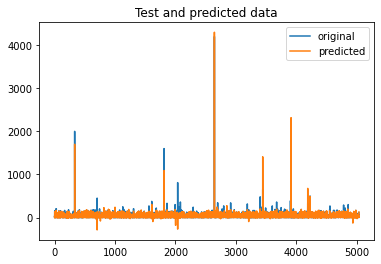

In [133]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, prediction, label="predicted")
plt.title("Test and predicted data")
plt.legend()
plt.show()